In [1]:
import sys
print(sys.version)

3.9.19 (main, May  6 2024, 20:12:36) [MSC v.1916 64 bit (AMD64)]


In [1]:
import os
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import efficientnet_b0
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter
from PIL import Image

# 모델 로드 및 수정 함수
def load_model(name, num_classes, pretrained):
    model = efficientnet_b0(pretrained=pretrained)
    num_ftrs = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_ftrs, num_classes)
    
    if not pretrained:
        if (name == "model3.pth"):
            model.load_state_dict(torch.load(name, map_location=device))
        else:
            # 사전 훈련되지 않은 모델에 대해 가중치 로드
            model = efficientnet_b0(pretrained=False)
            num_ftrs = model.classifier[1].in_features
            model.classifier[1] = nn.Linear(num_ftrs, num_classes)
    model = model.to(device)
    model.eval()  # 평가 모드로 전환
    return model

# 학습 및 검증 루프
def train_validate(model, trainloader, valloader, criterion, optimizer, writer, device, epochs=10):
    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(trainloader)
        writer.add_scalar('Loss/Train', avg_train_loss, epoch)

        model.eval()
        total_val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in valloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        avg_val_loss = total_val_loss / len(valloader)
        accuracy = 100 * correct / total
        writer.add_scalar('Loss/Validation', avg_val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', accuracy, epoch)
        print(f"Epoch {epoch+1}/{epochs}: Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4f}%")

if __name__ == "__main__":
    data_dir = 'C:/pratice_data/casting/data'
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
    dataset = ImageFolder(root=data_dir, transform=transform)
    torch.manual_seed(42)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    trainloader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)
    valloader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=4)

    model_names = ["efficientnet_b0_weights_pretrained.pth", "model3.pth", "efficientnet_b0_weights_notPretrained.pth"]
    pretrained_status = [True, False, False]
    titles = ["Pretrained Model", "Custom Trained Model", "Not Pretrained Model"]

    for i, model_name in enumerate(model_names):
        writer = SummaryWriter(f'runs/{titles[i]}')
        model = load_model(model_name, len(dataset.classes), pretrained_status[i])
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
        train_validate(model, trainloader, valloader, criterion, optimizer, writer, device, epochs=10)
        writer.close()


Epoch 1/10: Train Loss: 0.4896, Val Loss: 0.2377, Accuracy: 94.6154%
Epoch 2/10: Train Loss: 0.2629, Val Loss: 0.0965, Accuracy: 98.4615%
Epoch 3/10: Train Loss: 0.1350, Val Loss: 0.0722, Accuracy: 98.0769%
Epoch 4/10: Train Loss: 0.0858, Val Loss: 0.0741, Accuracy: 98.4615%
Epoch 5/10: Train Loss: 0.1128, Val Loss: 0.0296, Accuracy: 98.8462%
Epoch 6/10: Train Loss: 0.0549, Val Loss: 0.0396, Accuracy: 98.4615%
Epoch 7/10: Train Loss: 0.0525, Val Loss: 0.0220, Accuracy: 98.8462%
Epoch 8/10: Train Loss: 0.0610, Val Loss: 0.0155, Accuracy: 99.2308%
Epoch 9/10: Train Loss: 0.0389, Val Loss: 0.0297, Accuracy: 98.8462%
Epoch 10/10: Train Loss: 0.0439, Val Loss: 0.0179, Accuracy: 98.8462%
Epoch 1/10: Train Loss: 0.3948, Val Loss: 0.0967, Accuracy: 97.3077%
Epoch 2/10: Train Loss: 0.1287, Val Loss: 0.0415, Accuracy: 98.8462%
Epoch 3/10: Train Loss: 0.0775, Val Loss: 0.0294, Accuracy: 98.8462%
Epoch 4/10: Train Loss: 0.0717, Val Loss: 0.0174, Accuracy: 99.2308%
Epoch 5/10: Train Loss: 0.0580, V

Epoch 1/10: Train Loss: 0.5071, Val Loss: 0.3460, Accuracy: 80.38%
Epoch 2/10: Train Loss: 0.3099, Val Loss: 0.1929, Accuracy: 96.92%
Epoch 3/10: Train Loss: 0.1867, Val Loss: 0.1133, Accuracy: 98.46%
Epoch 4/10: Train Loss: 0.1203, Val Loss: 0.0717, Accuracy: 98.85%
Epoch 5/10: Train Loss: 0.0866, Val Loss: 0.0529, Accuracy: 98.85%
Epoch 6/10: Train Loss: 0.0690, Val Loss: 0.0435, Accuracy: 98.85%
Epoch 7/10: Train Loss: 0.0453, Val Loss: 0.0327, Accuracy: 99.23%
Epoch 8/10: Train Loss: 0.0515, Val Loss: 0.0345, Accuracy: 99.23%
Epoch 9/10: Train Loss: 0.0409, Val Loss: 0.0421, Accuracy: 98.85%
Epoch 10/10: Train Loss: 0.0366, Val Loss: 0.0293, Accuracy: 98.85%


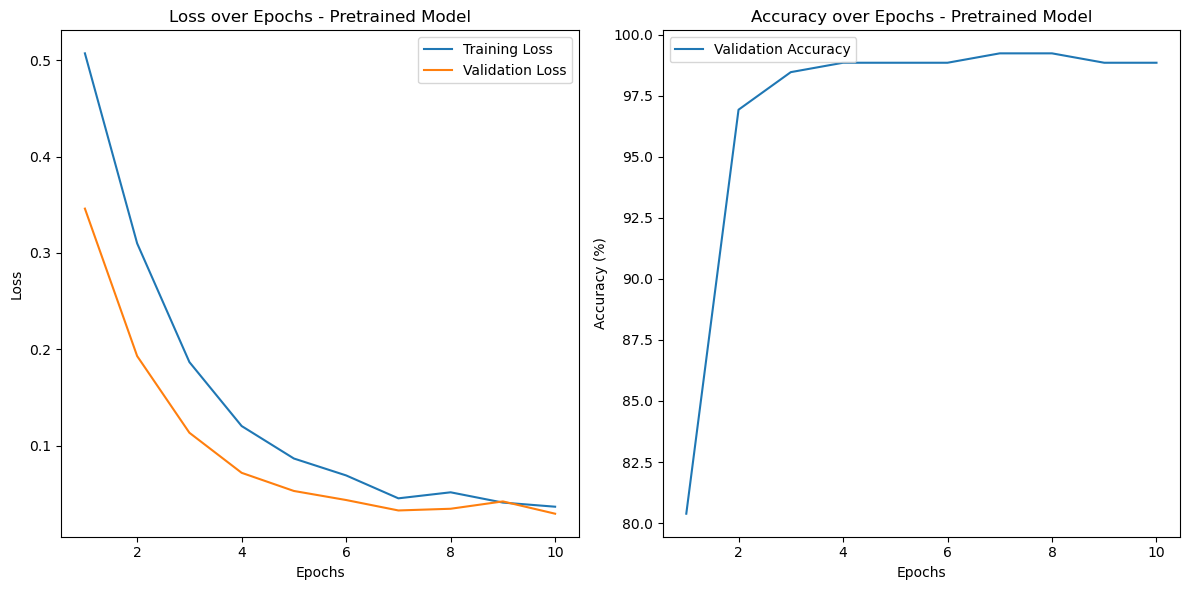

Epoch 1/10: Train Loss: 0.4834, Val Loss: 0.3166, Accuracy: 84.62%
Epoch 2/10: Train Loss: 0.2790, Val Loss: 0.1755, Accuracy: 96.54%
Epoch 3/10: Train Loss: 0.1695, Val Loss: 0.1040, Accuracy: 98.46%
Epoch 4/10: Train Loss: 0.0990, Val Loss: 0.0801, Accuracy: 98.46%
Epoch 5/10: Train Loss: 0.0705, Val Loss: 0.0597, Accuracy: 98.85%
Epoch 6/10: Train Loss: 0.0591, Val Loss: 0.0563, Accuracy: 98.85%
Epoch 7/10: Train Loss: 0.0493, Val Loss: 0.0605, Accuracy: 98.85%
Epoch 8/10: Train Loss: 0.0377, Val Loss: 0.0412, Accuracy: 98.85%
Epoch 9/10: Train Loss: 0.0455, Val Loss: 0.0454, Accuracy: 98.85%
Epoch 10/10: Train Loss: 0.0227, Val Loss: 0.0445, Accuracy: 98.85%


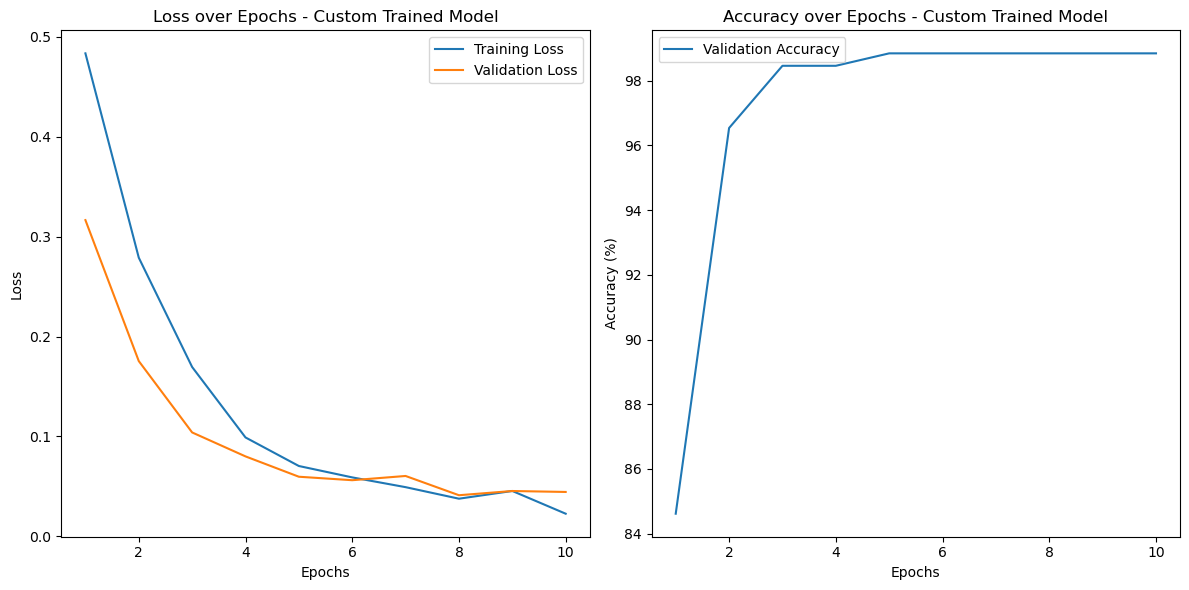

Epoch 1/10: Train Loss: 0.1262, Val Loss: 0.3044, Accuracy: 88.85%
Epoch 2/10: Train Loss: 0.1061, Val Loss: 0.4583, Accuracy: 86.54%
Epoch 3/10: Train Loss: 0.1262, Val Loss: 0.3120, Accuracy: 86.15%
Epoch 4/10: Train Loss: 0.1074, Val Loss: 0.4096, Accuracy: 80.77%
Epoch 5/10: Train Loss: 0.0888, Val Loss: 0.4029, Accuracy: 85.77%
Epoch 6/10: Train Loss: 0.0958, Val Loss: 0.4104, Accuracy: 87.69%
Epoch 7/10: Train Loss: 0.0949, Val Loss: 0.3722, Accuracy: 86.15%
Epoch 8/10: Train Loss: 0.0601, Val Loss: 0.3268, Accuracy: 89.62%
Epoch 9/10: Train Loss: 0.0814, Val Loss: 0.4702, Accuracy: 86.92%
Epoch 10/10: Train Loss: 0.0962, Val Loss: 0.3321, Accuracy: 86.92%


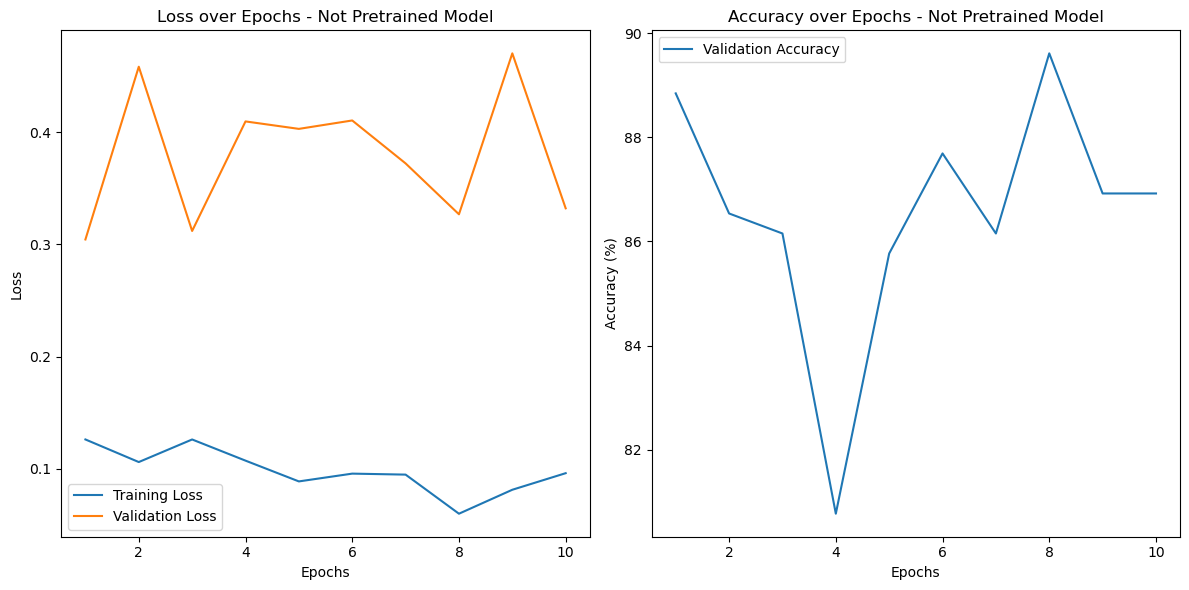

In [4]:
import os
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import efficientnet_b0
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from PIL import Image
import matplotlib.pyplot as plt
import gc
from collections import Counter

# 모델 로드 및 수정 함수
def load_model(name, num_classes, pretrained):
    # 모델 로드, pretrained 파라미터에 따라 사전 훈련된 가중치 사용 여부 결정
    model = efficientnet_b0(pretrained=pretrained)
    num_ftrs = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_ftrs, num_classes)
    
    if not pretrained:
        # 사전 훈련되지 않은 모델에 대해 가중치 로드
        model.load_state_dict(torch.load(name, map_location=device))
    
    model = model.to(device)
    model.eval()  # 평가 모드로 전환
    return model

# 이미지 전처리 함수
def preprocess_image(image_path):
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert('RGB')
    image = preprocess(image)
    image = image.unsqueeze(0)  # 배치 차원 추가
    return image

# 예측 함수
def predict(image_path, model):
    image = preprocess_image(image_path)
    image = image.to(next(model.parameters()).device)  # 모델과 동일한 디바이스로 이동

    # 원본 이미지 로드 (전처리 전)
    original_image = Image.open(image_path).convert('RGB')

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    # 이미지 출력
    plt.imshow(original_image)
    plt.title(f'Predicted class: {predicted.item()}')
    plt.show()

    return predicted.item()

# 학습 및 검증 루프
def train_validate(model, trainloader, valloader, criterion, optimizer, device, epochs=10):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        # Training
        model.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        train_loss = running_loss / len(trainloader)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        correct = 0
        total = 0
        running_loss = 0.0
        with torch.no_grad():
            for inputs, labels in valloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_loss = running_loss / len(valloader)
        val_losses.append(val_loss)
        accuracy = 100 * correct / total
        val_accuracies.append(accuracy)

        print(f"Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%")

    return train_losses, val_losses, val_accuracies

# 결과 시각화 함수
def plot_results(train_losses, val_losses, val_accuracies, title):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.title(f'Loss over Epochs - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.title(f'Accuracy over Epochs - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    data_dir = 'C:\pratice_data\casting\data'
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
    dataset = ImageFolder(root=data_dir, transform=transform)
    torch.manual_seed(42)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    trainloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=8)
    valloader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=8)
    class_weights = [1.0 / len(train_dataset) * sum([1 for _, label in train_dataset if label == i]) for i in range(len(dataset.classes))]
    class_weights = torch.FloatTensor(class_weights).to(device)
    model_names = ["efficientnet_b0_weights_pretrained.pth", "model3.pth", "efficientnet_b0_weights_notPretrained.pth"]
    pretrained_status = [True, False, False]
    titles = ["Pretrained Model", "Custom Trained Model", "Not Pretrained Model"]

    for i, model_name in enumerate(model_names):
        model = load_model(model_name, len(dataset.classes), pretrained_status[i])
        criterion = nn.CrossEntropyLoss(weight=class_weights)
        optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
        train_losses, val_losses, val_accuracies = train_validate(model, trainloader, valloader, criterion, optimizer, device, epochs=10)
        plot_results(train_losses, val_losses, val_accuracies, titles[i])


In [ ]:
import os
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import efficientnet_b0
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from PIL import Image
import matplotlib.pyplot as plt
import gc
from collections import Counter


# 모델 로드 및 수정
def load_model(name, num_classes):
    model = efficientnet_b0(pretrained=False)
    num_ftrs = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_ftrs, num_classes)
    
    # 모델을 현재 시스템의 사용 가능한 디바이스에 맞게 로드
    model.load_state_dict(torch.load(name, map_location=device))
    
    model = model.to(device)
    model.eval()  # 평가 모드로 전환
    return model


# 이미지 전처리 함수
def preprocess_image(image_path):
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert('RGB')
    image = preprocess(image)
    image = image.unsqueeze(0)  # 배치 차원 추가
    return image

# 예측 함수
def predict(image_path, model):
    image = preprocess_image(image_path)
    image = image.to(next(model.parameters()).device)  # 모델과 동일한 디바이스로 이동

    # 원본 이미지 로드 (전처리 전)
    original_image = Image.open(image_path).convert('RGB')

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    # 이미지 출력
    plt.imshow(original_image)
    plt.title(f'Predicted class: {predicted.item()}')
    plt.show()

    return predicted.item()

# 학습 루프 작성
def train(model, trainloader, criterion, optimizer, device, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

def validate(model, valloader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in valloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    loss = running_loss / len(valloader)
    print(f"Validation Loss: {loss}, Accuracy: {accuracy}%")
    return loss, accuracy


if __name__ == "__main__":

    # 데이터셋 경로
    data_dir = 'C:/pratice_data/casting/data'

    # 데이터 변환 설정
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

    # ImageFolder를 사용하여 데이터셋 로드
    dataset = ImageFolder(root=data_dir, transform=transform)

    # 난수 시드 설정
    seed = 42
    torch.manual_seed(seed)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # 학습과 검증 데이터셋으로 나누기
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    trainloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
    valloader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)

    print(f'Class names: {dataset.classes}')

    # 클래스 가중치 계산
    class_counts = Counter([label for _, label in dataset.samples])
    print(class_counts)
    class_weights = [1.0 / class_counts[i] for i in range(len(dataset.classes))]
    
    class_weights = torch.FloatTensor(class_weights).to(device)

    # 미리 학습된 모델 사용
    model = efficientnet_b0(pretrained=True)
    num_ftrs = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_ftrs, len(dataset.classes))  # 클래스 수에 맞게 출력 레이어 수정
    model = model.to(device)

    # 손실 함수 및 옵티마이저 설정
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    # 학습 및 평가
    epochs = 10
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        train(model, trainloader, criterion, optimizer, device, epochs=1)
        validate(model, valloader, criterion, device)

    torch.save(model.state_dict(), 'efficientnet_b0_weights_pretrained.pth')

    print("-------------------------------\n\n\n")

    # 자동차부품 결함으로 학습된 모델 사용
    model = load_model('model3.pth', 2)
    num_ftrs = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_ftrs, len(dataset.classes))  # 클래스 수에 맞게 출력 레이어 수정
    model = model.to(device)

    # 손실 함수 및 옵티마이저 설정
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    # 학습 및 평가
    epochs = 10
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        train(model, trainloader, criterion, optimizer, device, epochs=1)
        validate(model, valloader, criterion, device)

    torch.save(model.state_dict(), 'efficientnet_b0_weights_customTrained.pth')

    print("-------------------------------\n\n\n")
    
    # 처음부터 학습시작
    model = efficientnet_b0(pretrained=False)
    num_ftrs = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_ftrs, len(dataset.classes))  # 클래스 수에 맞게 출력 레이어 수정
    model = model.to(device)

    # 손실 함수 및 옵티마이저 설정
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    # 학습 및 평가
    epochs = 10
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        train(model, trainloader, criterion, optimizer, device, epochs=1)
        validate(model, valloader, criterion, device)

    torch.save(model.state_dict(), 'efficientnet_b0_weights_notPretrained.pth')

    print("-------------------------------\n\n\n")
    
    # 예시 이미지 파일 경로
    ok_image_path = 'ok_sample.jpeg'
    def_image_path = 'def_sample.jpeg'

    num_classes = 2  # 예시 클래스 수
    class_name = ["결함", "양품"]

    # 미리 학습된 가중치를 사용한 모델 로드
    loaded_model_pretrained = load_model('efficientnet_b0_weights_pretrained.pth', 2)

    # 예측 수행
    print("미리 학습된 가중치를 사용한 모델")
    predicted_class = predict(ok_image_path, loaded_model_pretrained)
    print(f'ok sample Predicted class: {class_name[predicted_class]}')
    print("\n\n")

    predicted_class = predict(def_image_path, loaded_model_pretrained)
    print(f'def sample Predicted class: {class_name[predicted_class]}')
    print("\n\n")

    # 자동차 부품결함으로 학습된 가중치를 사용한 모델 로드
    loaded_model_pretrained = load_model('efficientnet_b0_weights_customTrained.pth', 2)

    # 예측 수행
    print("자동차부품 결함으로 학습된 가중치를 사용한 모델")
    predicted_class = predict(ok_image_path, loaded_model_pretrained)
    print(f'ok sample Predicted class: {class_name[predicted_class]}')
    print("\n\n")

    predicted_class = predict(def_image_path, loaded_model_pretrained)
    print(f'def sample Predicted class: {class_name[predicted_class]}')
    print("\n\n")

    # 미리 학습된 가중치를 사용하지 않는 모델 로드
    loaded_model_notPretrained = load_model('efficientnet_b0_weights_notPretrained.pth', 2)

    # 예측 수행
    print("미리 학습된 가중치를 사용하지 않는 모델\n")
    predicted_class = predict(ok_image_path, loaded_model_notPretrained)
    print(f'ok sample Predicted class: {class_name[predicted_class]}')
    print("\n\n")

    predicted_class = predict(def_image_path, loaded_model_notPretrained)
    print(f'def sample Predicted class: {class_name[predicted_class]}')
    print("\n\n")

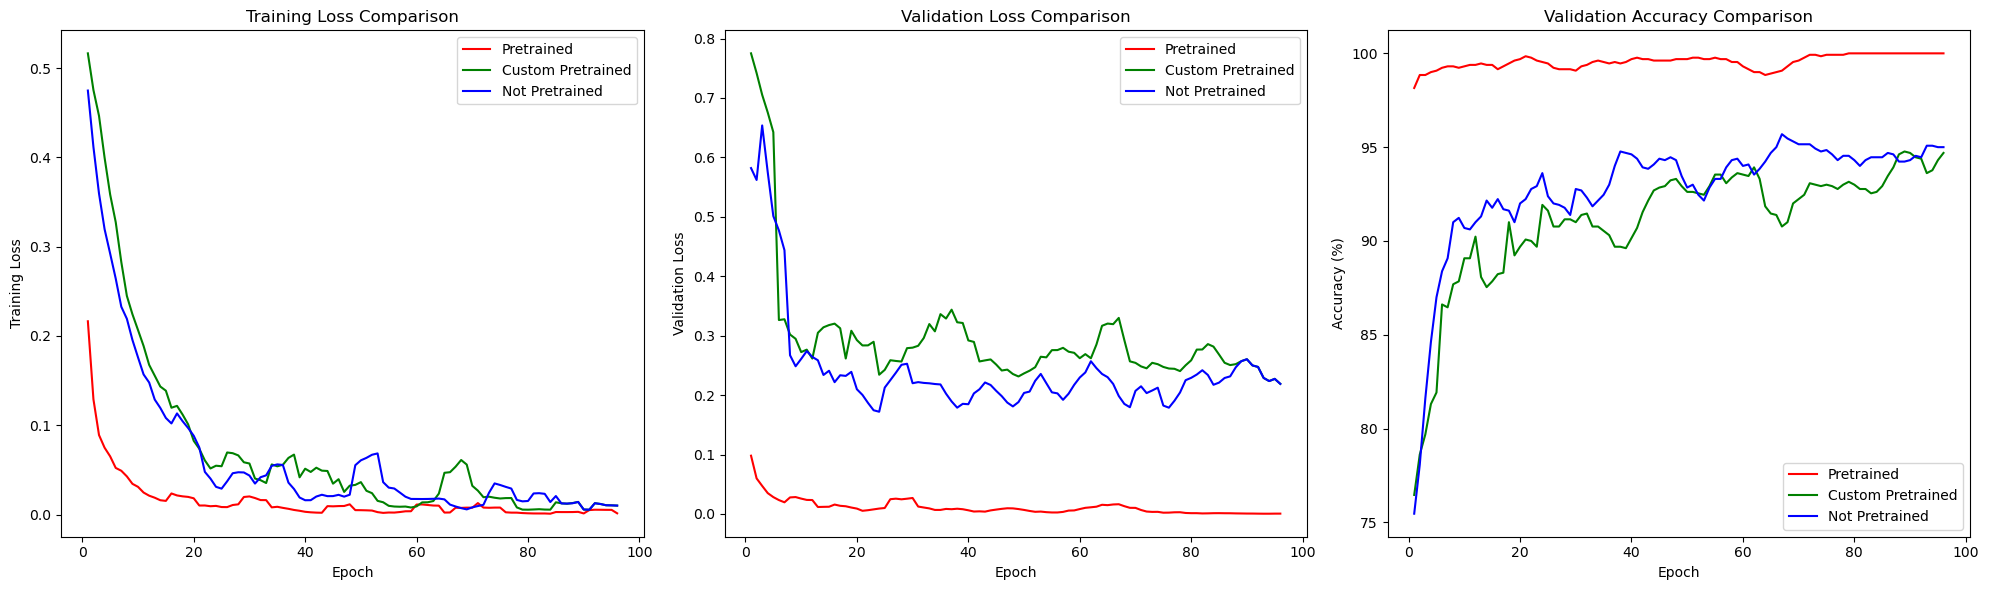

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function to smooth data with a moving average
def smooth_data(data, window_size=5):
    window = np.ones(window_size) / window_size
    return np.convolve(data, window, 'valid')
# Epochs
epochs = range(1, 101)

# Pretrained Model Data
train_loss_pretrained = [
    0.4905, 0.2571, 0.1334, 0.0858, 0.1155, 0.0533, 0.0571, 0.0627, 0.0372, 0.0507,
    0.0375, 0.0255, 0.0211, 0.0203, 0.0188, 0.0199, 0.0142, 0.0069, 0.0167, 0.0604,
    0.0088, 0.0091, 0.0038, 0.0089, 0.0199, 0.0090, 0.0050, 0.0056, 0.0025, 0.0195,
    0.0208, 0.0088, 0.0467, 0.0056, 0.0105, 0.0094, 0.0085, 0.0063, 0.0087, 0.0045,
    0.0041, 0.0021, 0.0017, 0.0030, 0.0016, 0.0024, 0.0013, 0.0388, 0.0019, 0.0030,
    0.0029, 0.0106, 0.0063, 0.0016, 0.0022, 0.0016, 0.0018, 0.0021, 0.0037, 0.0018,
    0.0047, 0.0059, 0.0024, 0.0410, 0.0025, 0.0017, 0.0029, 0.0017, 0.0022, 0.0031,
    0.0280, 0.0023, 0.0030, 0.0020, 0.0289, 0.0028, 0.0012, 0.0040, 0.0021, 0.0025,
    0.0009, 0.0011, 0.0017, 0.0007, 0.0017, 0.0008, 0.0011, 0.0004, 0.0101, 0.0014,
    0.0008, 0.0013, 0.0015, 0.0012, 0.0202, 0.0028, 0.0010, 0.0011, 0.0011, 0.0009
]
val_loss_pretrained = [
    0.2250, 0.0927, 0.0747, 0.0574, 0.0406, 0.0341, 0.0294, 0.0141, 0.0239, 0.0156,
    0.0153, 0.0705, 0.0170, 0.0110, 0.0046, 0.0143, 0.0119, 0.0183, 0.0119, 0.0229,
    0.0039, 0.0080, 0.0076, 0.0030, 0.0044, 0.0089, 0.0149, 0.0145, 0.0077, 0.0784,
    0.0134, 0.0095, 0.0196, 0.0137, 0.0063, 0.0055, 0.0019, 0.0068, 0.0137, 0.0148,
    0.0030, 0.0060, 0.0026, 0.0047, 0.0044, 0.0047, 0.0035, 0.0129, 0.0115, 0.0107,
    0.0096, 0.0025, 0.0072, 0.0042, 0.0021, 0.0024, 0.0044, 0.0023, 0.0016, 0.0021,
    0.0072, 0.0154, 0.0037, 0.0130, 0.0126, 0.0117, 0.0204, 0.0197, 0.0100, 0.0183,
    0.0137, 0.0040, 0.0059, 0.0095, 0.0005, 0.0007, 0.0010, 0.0064, 0.0023, 0.0011,
    0.0035, 0.0015, 0.0002, 0.0006, 0.0011, 0.0013, 0.0022, 0.0015, 0.0009, 0.0004,
    0.0011, 0.0011, 0.0009, 0.0002, 0.0003, 0.0004, 0.0006, 0.0009, 0.0008, 0.0004
]
val_acc_pretrained = [
    95.3846, 98.8462, 98.8462, 98.8462, 98.8462, 98.8462, 98.8462, 99.6154, 99.2308, 99.6154,
    99.2308, 98.8462, 99.2308, 99.6154, 100.0000, 99.2308, 99.2308, 98.8462, 99.6154, 98.8462,
    100.0000, 100.0000, 99.6154, 100.0000, 99.6154, 99.6154, 99.2308, 99.2308, 99.6154, 98.4615,
    99.2308, 99.2308, 99.2308, 99.2308, 99.6154, 99.6154, 100.0000, 99.6154, 98.8462, 99.2308,
    100.0000, 99.6154, 100.0000, 99.6154, 99.6154, 99.6154, 99.6154, 99.6154, 99.6154, 99.6154,
    99.6154, 100.0000, 99.6154, 99.6154, 100.0000, 99.6154, 99.6154, 99.6154, 100.0000, 99.6154,
    99.6154, 98.8462, 99.6154, 98.8462, 98.8462, 98.8462, 98.8462, 98.8462, 99.2308, 99.2308,
    99.2308, 100.0000, 100.0000, 99.6154, 100.0000, 100.0000, 100.0000, 99.6154, 100.0000, 100.0000,
    100.0000, 100.0000, 100.0000, 100.0000, 100.0000, 100.0000, 100.0000, 100.0000, 100.0000, 100.0000,
    100.0000, 100.0000, 100.0000, 100.0000, 100.0000, 100.0000, 100.0000, 100.0000, 100.0000, 100.0000
]

# Custom Trained Model Data
train_loss_custom = [
    0.6358, 0.5309, 0.5155, 0.4635, 0.4369, 0.4303, 0.3864, 0.2815, 0.2570, 0.2820,
    0.2072, 0.1965, 0.1789, 0.1686, 0.1929, 0.1013, 0.1360, 0.1181, 0.1452, 0.0975,
    0.1118, 0.0873, 0.0631, 0.0532, 0.0530, 0.0464, 0.0423, 0.0785, 0.0503, 0.1301,
    0.0423, 0.0299, 0.0401, 0.0434, 0.0458, 0.0331, 0.0141, 0.1442, 0.0329, 0.0543,
    0.0716, 0.0327, 0.0170, 0.0810, 0.0362, 0.0954, 0.0162, 0.0152, 0.0099, 0.0613,
    0.0242, 0.0512, 0.0194, 0.0254, 0.0128, 0.0109, 0.0082, 0.0115, 0.0054, 0.0089,
    0.0097, 0.0093, 0.0061, 0.0117, 0.0312, 0.0104, 0.0163, 0.0478, 0.1281, 0.0345,
    0.0412, 0.0538, 0.0222, 0.0092, 0.0075, 0.0044, 0.0567, 0.0163, 0.0050, 0.0097,
    0.0047, 0.0041, 0.0042, 0.0045, 0.0109, 0.0062, 0.0021, 0.0037, 0.0456, 0.0055,
    0.0035, 0.0061, 0.0099, 0.0030, 0.0046, 0.0398, 0.0018, 0.0029, 0.0023, 0.0033
]
val_loss_custom = [
    0.5106, 0.5674, 0.4055, 0.5604, 1.8315, 0.3446, 0.3843, 0.2570, 0.3949, 0.2510,
    0.3511, 0.2559, 0.2210, 0.2831, 0.2714, 0.2762, 0.4727, 0.2672, 0.3019, 0.2834,
    0.2374, 0.2180, 0.5009, 0.2232, 0.2385, 0.2380, 0.2482, 0.2238, 0.2641, 0.3195,
    0.2318, 0.2434, 0.3363, 0.2684, 0.3352, 0.2971, 0.3609, 0.2750, 0.4131, 0.2983,
    0.3716, 0.2550, 0.2688, 0.2665, 0.2858, 0.2071, 0.2641, 0.2768, 0.2236, 0.2356,
    0.2145, 0.2271, 0.2562, 0.2494, 0.2584, 0.2438, 0.3151, 0.2512, 0.3100, 0.2589,
    0.2627, 0.2826, 0.2417, 0.2648, 0.2931, 0.2279, 0.3988, 0.3987, 0.2835, 0.2881,
    0.2806, 0.2124, 0.2196, 0.2708, 0.2583, 0.2645, 0.2586, 0.2081, 0.2476, 0.2451,
    0.2621, 0.2392, 0.2570, 0.2895, 0.3353, 0.2629, 0.2846, 0.2360, 0.2228, 0.2658,
    0.2436, 0.2924, 0.2610, 0.2392, 0.2137, 0.2308, 0.2000, 0.2345, 0.2579, 0.1715
]
val_acc_custom = [
    75.0000, 78.8462, 83.0769, 79.2308, 66.1538, 85.7692, 84.2308, 91.1538, 82.3077, 89.6154,
    85.0000, 90.3846, 91.9231, 88.4615, 89.6154, 90.7692, 79.6154, 89.2308, 90.0000, 91.5385,
    91.1538, 93.0769, 80.3846, 92.3077, 93.4615, 90.7692, 91.5385, 91.5385, 90.7692, 89.2308,
    90.7692, 93.4615, 91.5385, 90.0000, 91.1538, 91.1538, 90.0000, 91.5385, 88.8462, 90.0000,
    88.0769, 90.0000, 91.1538, 91.5385, 92.6923, 92.3077, 93.0769, 93.8462, 92.3077, 93.0769,
    93.8462, 93.4615, 91.9231, 90.7692, 93.0769, 93.4615, 93.0769, 94.2308, 93.8462, 93.0769,
    91.1538, 94.6154, 95.3846, 93.4615, 92.6923, 93.4615, 91.5385, 88.0769, 91.5385, 92.3077,
    90.3846, 92.6923, 93.0769, 92.6923, 93.4615, 93.4615, 92.3077, 92.6923, 93.0769, 93.0769,
    92.6923, 93.4615, 93.4615, 92.3077, 91.9231, 92.6923, 92.3077, 93.8462, 93.8462, 94.6154,
    95.0000, 95.7692, 94.6154, 93.4615, 93.4615, 94.6154, 91.9231, 95.3846, 96.1538, 95.3846
]

# Not Pretrained Model Data
train_loss_not_pretrained = [
    0.6282, 0.5314, 0.4708, 0.3839, 0.3600, 0.3118, 0.2711, 0.2714, 0.2469, 0.2199,
    0.1544, 0.2036, 0.1528, 0.1493, 0.1245, 0.1092, 0.1081, 0.1060, 0.0930, 0.0938,
    0.1654, 0.0646, 0.0676, 0.0497, 0.0284, 0.0285, 0.0273, 0.0213, 0.0395, 0.0696,
    0.0737, 0.0327, 0.0202, 0.0222, 0.0246, 0.1093, 0.0432, 0.0733, 0.0304, 0.0214,
    0.0104, 0.0076, 0.0256, 0.0151, 0.0217, 0.0308, 0.0176, 0.0178, 0.0154, 0.0288,
    0.0207, 0.0283, 0.1831, 0.0427, 0.0426, 0.0381, 0.0358, 0.0222, 0.0121, 0.0376,
    0.0154, 0.0126, 0.0097, 0.0119, 0.0373, 0.0158, 0.0134, 0.0110, 0.0074, 0.0081,
    0.0052, 0.0042, 0.0040, 0.0187, 0.0155, 0.0120, 0.0717, 0.0564, 0.0099, 0.0050,
    0.0025, 0.0080, 0.0485, 0.0119, 0.0472, 0.0040, 0.0044, 0.0025, 0.0456, 0.0055,
    0.0035, 0.0061, 0.0099, 0.0030, 0.0046, 0.0398, 0.0018, 0.0029, 0.0023, 0.0033
]
val_loss_not_pretrained = [
    0.5164, 0.6649, 0.7836, 0.5969, 0.3483, 0.4165, 1.1236, 0.3893, 0.2287, 0.2278,
    0.2498, 0.2399, 0.2965, 0.2908, 0.2935, 0.2008, 0.2115, 0.1729, 0.3264, 0.1974,
    0.2589, 0.2062, 0.2068, 0.1800, 0.1499, 0.1913, 0.1447, 0.1943, 0.3832, 0.2123,
    0.2543, 0.2110, 0.2032, 0.2194, 0.2215, 0.2477, 0.2077, 0.1972, 0.2157, 0.1438,
    0.1826, 0.1552, 0.2294, 0.2125, 0.2347, 0.2174, 0.2124, 0.2082, 0.1634, 0.1900,
    0.1631, 0.1803, 0.2446, 0.2403, 0.2016, 0.2535, 0.2383, 0.1668, 0.1633, 0.1928,
    0.1993, 0.2899, 0.2413, 0.2248, 0.2356, 0.2933, 0.2318, 0.1925, 0.1979, 0.1786,
    0.1921, 0.1651, 0.1645, 0.3355, 0.2170, 0.1351, 0.1868, 0.1883, 0.1849, 0.1992,
    0.1936, 0.2563, 0.2917, 0.2047, 0.2267, 0.2300, 0.2162, 0.2095, 0.2228, 0.2658,
    0.2436, 0.2924, 0.2610, 0.2392, 0.2137, 0.2308, 0.2000, 0.2345, 0.2579, 0.1715
]
val_acc_not_pretrained = [
    74.6154, 64.6154, 73.4615, 80.0000, 84.6154, 87.6923, 82.3077, 88.4615, 91.9231, 91.5385,
    91.1538, 91.9231, 89.6154, 89.2308, 91.1538, 93.0769, 93.4615, 93.8462, 87.3077, 93.4615,
    90.3846, 93.0769, 90.7692, 92.3077, 94.6154, 93.0769, 93.8462, 94.2308, 86.1538, 92.6923,
    92.6923, 93.0769, 92.3077, 93.0769, 92.3077, 90.7692, 90.7692, 93.8462, 94.6154, 95.0000,
    95.7692, 94.6154, 93.4615, 94.2308, 93.8462, 93.4615, 94.2308, 94.6154, 95.7692, 93.4615,
    94.2308, 93.4615, 90.3846, 92.6923, 94.2308, 91.5385, 91.9231, 93.8462, 95.0000, 94.2308,
    94.6154, 93.8462, 94.2308, 93.0769, 94.6154, 91.9231, 95.3846, 96.1538, 95.3846, 96.1538,
    95.3846, 94.2308, 95.3846, 94.6154, 96.1538, 95.3846, 93.0769, 94.6154, 95.0000, 95.0000,
    93.8462, 94.2308, 94.6154, 93.8462, 93.4615, 95.3846, 95.0000, 94.6154, 93.8462, 94.6154,
    95.0000, 93.0769, 94.6154, 94.2308, 95.7692, 94.6154, 96.1538, 94.6154, 93.8462, 95.7692
]

# Smoothing the data
smooth_train_loss_pretrained = smooth_data(train_loss_pretrained)
smooth_val_loss_pretrained = smooth_data(val_loss_pretrained)
smooth_val_acc_pretrained = smooth_data(val_acc_pretrained)

smooth_train_loss_custom = smooth_data(train_loss_custom)
smooth_val_loss_custom = smooth_data(val_loss_custom)
smooth_val_acc_custom = smooth_data(val_acc_custom)

smooth_train_loss_not_pretrained = smooth_data(train_loss_not_pretrained)
smooth_val_loss_not_pretrained = smooth_data(val_loss_not_pretrained)
smooth_val_acc_not_pretrained = smooth_data(val_acc_not_pretrained)

# Adjust epochs to match the length of smoothed data
smooth_epochs = np.arange(1, len(smooth_train_loss_pretrained) + 1)

# Plotting
plt.figure(figsize=(20, 6))

# Training Loss
plt.subplot(1, 3, 1)
plt.plot(smooth_epochs, smooth_train_loss_pretrained, 'r', label='Pretrained')
plt.plot(smooth_epochs, smooth_train_loss_custom, 'g', label='Custom Pretrained')
plt.plot(smooth_epochs, smooth_train_loss_not_pretrained, 'b', label='Not Pretrained')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

# Validation Loss
plt.subplot(1, 3, 2)
plt.plot(smooth_epochs, smooth_val_loss_pretrained, 'r', label='Pretrained')
plt.plot(smooth_epochs, smooth_val_loss_custom, 'g', label='Custom Pretrained')
plt.plot(smooth_epochs, smooth_val_loss_not_pretrained, 'b', label='Not Pretrained')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()

# Validation Accuracy
plt.subplot(1, 3, 3)
plt.plot(smooth_epochs, smooth_val_acc_pretrained, 'r', label='Pretrained')
plt.plot(smooth_epochs, smooth_val_acc_custom, 'g', label='Custom Pretrained')
plt.plot(smooth_epochs, smooth_val_acc_not_pretrained, 'b', label='Not Pretrained')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()